## Image I/O

In [4]:
import sys
import os

%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [10]:
# coronal scan of same patient's covid-infected lung showing disease markers

# TO-DO: manually setting path here, need an interface to take input
dicom_dir = "D:/NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/601.000000-COR 3X3-86740"

print("Reading Dicom directory:", dicom_dir)
reader = sitk.ImageSeriesReader()

dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)

reader.SetFileNames(dicom_names)

image = reader.Execute()

size = image.GetSize()
print("Image size:", size[0], size[1], size[2])

print("Writing image:", "MIDRC-RICORD-1A_coronal_image.nii")

sitk.WriteImage(image, "MIDRC-RICORD-1A_coronal_image.nii")

if ("SITK_NOSHOW" not in os.environ):
    sitk.Show(image, "Dicom Series")
    
    
covid_example = sitk.ReadImage("./MIDRC-RICORD-1A_coronal_image.nii")

print("Dimensions: " + str(covid_example.GetDimension()))
print("Width: " + str(covid_example.GetWidth()))
print("Height: " + str(covid_example.GetHeight()))
print("Depth: " + str(covid_example.GetDepth()))
print("Pixel ID: " + str(covid_example.GetPixelIDValue()))
print("Pixel Type: " + str(covid_example.GetPixelIDTypeAsString()))
print("Components Per Pixel: " + str(covid_example.GetNumberOfComponentsPerPixel()))

Reading Dicom directory: D:/NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/601.000000-COR 3X3-86740
Image size: 512 512 106
Writing image: MIDRC-RICORD-1A_coronal_image.nii
Dimensions: 3
Width: 512
Height: 512
Depth: 106
Pixel ID: 4
Pixel Type: 32-bit signed integer
Components Per Pixel: 1


In [13]:
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

import SimpleITK as sitk

# Download data to work on
%run update_path_to_download_script
# from downloaddata import fetch_data as fdata
from myshow import myshow, myshow3d
  
# Read the image
dicom_dir = "D:/NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100"

print("Reading Dicom directory:", dicom_dir)
reader = sitk.ImageSeriesReader()

dicom_names = reader.GetGDCMSeriesFileNames(dicom_dir)

reader.SetFileNames(dicom_names)
image = reader.Execute()

seg = image > 200
myshow(sitk.LabelOverlay(image, seg), "Basic Thresholding")


# To visualize the labels image in RGB with needs a image with 0-255 range
image_rgb = sitk.Cast(sitk.RescaleIntensity(image), sitk.sitkUInt8)

Reading Dicom directory: D:/NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

In [14]:
otsu_filter = sitk.OtsuThresholdImageFilter()
otsu_filter.SetInsideValue(0)
otsu_filter.SetOutsideValue(1)
seg = otsu_filter.Execute(image_rgb)
myshow(sitk.LabelOverlay(image_rgb, seg), "Otsu Thresholding")

print(otsu_filter.GetThreshold() )

interactive(children=(IntSlider(value=127, description='z', max=254), Output()), _dom_classes=('widget-interac…

1.0


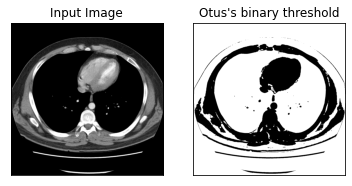

True

In [87]:
# Using an external viewer (ITK-SNAP or 3D Slicer) we identified a visually appealing window-level setting
T1_WINDOW_LEVEL = (1050, 500)

# image = sitk.ReadImage("NBIA_images/manifest-1608266677008/MIDRC-RICORD-1A/MIDRC-RICORD-1A-419639-000082/08-02-2002-NA-CT CHEST WITHOUT CONTRAST-04614/2.000000-ROUTINE CHEST NON-CON-97100")
# Rescale the intensities and map them to [0,255], these are the default values for the output
# We will use this image to display the results of segmentation
img_T1_255 = sitk.Cast(
    sitk.IntensityWindowing(
        image,
        windowMinimum=T1_WINDOW_LEVEL[1] - T1_WINDOW_LEVEL[0] / 2.0,
        windowMaximum=T1_WINDOW_LEVEL[1] + T1_WINDOW_LEVEL[0] / 2.0,
    ),
    sitk.sitkUInt8,
)

#************
#Can read .jpg, .jpe, .jpeg, .png formats
#In my case I tries images of Coronal lung window.zip in our repo
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('D:/NBIA_images/Axial C+/19.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite("test.tif", thresh)

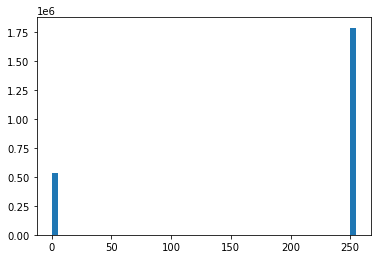

In [88]:
threshImg = sitk.ReadImage("test.tif")

plt.figure()
plt.hist(sitk.GetArrayViewFromImage(threshImg).flatten(), bins=50)
plt.show()

{1 px}


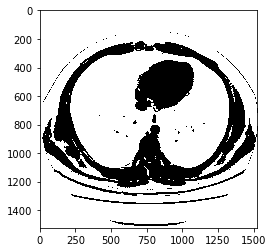

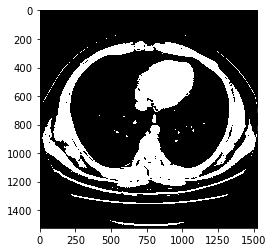

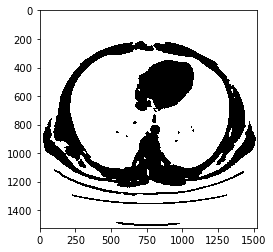

In [42]:
import diplib as dip

a = dip.ImageRead('test')
a.SetPixelSize(dip.PixelSize(dip.PhysicalQuantity(1,"px")))
print(a.PixelSize())

a = dip.ColorSpaceManager.Convert(a, 'gray')
a.Show()


obj = ~dip.Threshold(dip.Gauss(a))[0]
obj = dip.EdgeObjectsRemove(obj)
obj.Show()


obj = dip.Opening(dip.Closing(a,9),9)
obj.Show()


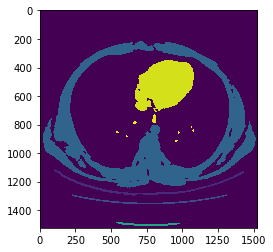

   |       Size |   Solidity | ConvexArea | 
-- | ---------- | ---------- | ---------- | 
   |            |            |            | 
   |     (px^2) |            |     (px^2) | 
-- | ---------- | ---------- | ---------- | 
 1 |  3.761e+05 |     0.3233 |  1.163e+06 | 
 2 |  1.096e+05 |     0.9372 |  1.170e+05 | 
 3 |      1468. |     0.9633 |      1524. | 
 4 |      456.0 |     0.9870 |      462.0 | 
 5 |      117.0 |     0.9957 |      117.5 | 
 6 |      232.0 |     0.9915 |      234.0 | 
 7 |      214.0 |     0.9862 |      217.0 | 
 8 |      225.0 |     0.9847 |      228.5 | 
 9 |      123.0 |     0.9880 |      124.5 | 
10 |      250.0 |     0.9881 |      253.0 | 
11 |  2.035e+04 |     0.1199 |  1.698e+05 | 
12 |  1.288e+04 |     0.2324 |  5.543e+04 | 
13 |      6219. |     0.5855 |  1.062e+04 | 



In [43]:
b = obj < 120
b = dip.EdgeObjectsRemove(b)
b = dip.Label(b, minSize=30)
m = dip.MeasurementTool.Measure(b, obj, ['Size', 'Solidity'])

c = dip.ObjectToMeasurement(b, m['Solidity'])
c.Show(colormap='viridis')

print(m)

